# Data Story of Client database

This data story concerns the data we have on our historical clients, as well as the expenditure wrangled in the data wrangling unit. Each row represents a claim, a claim is the period that R&D activity was undertaken that we are calculating for tax relief. Each period should be a year, i.e. from 01.04.15-31.03.16. Each row details the ID of each client ('CifNo'), which industry they're involved in, their status such as for each claim, the date by which we began our contract('DateReceived'), when we completed the claim ('Report Submitted'), how much of their expenditure qualified for tax relief ('RdRawCosts'), what the rate of tax relief should be derived from ('RdAdditional Costs'), what the benefit was ('ClientTaxBenefit'), what fees we charge for each client ('Fee Percentage'), their post code address, what turnover figures we have for the company, which phase the claim is, and their preferred benefit options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
staff_d = pd.read_csv('staff_costs.csv')
sub_d=pd.read_csv('subcontractor_costs.csv')
consum_d=pd.read_csv('consumables_costs.csv')
soft_d=pd.read_csv('software_costs.csv')
#visual check on the columns. For this analysis I will only extract the paid status claims as only they can evidence what the final fee would be.

In [3]:
# calculating the R&D value of each claim based on all costs. The total R&D spend per company. 
staff_cost = staff_d.set_index(['Cif', 'ye'])['cost']
staff_app = staff_d.set_index(['Cif', 'ye'])['pct']
staff_rd_cost=staff_cost.mul(staff_app/100)
staff_cost_groupby=staff_rd_cost.groupby(['Cif', 'ye']).sum()
staff_cost_sum=pd.DataFrame(staff_cost_groupby)

sub_cost = sub_d.set_index(['Cif', 'ye'])['costs']
sub_app = sub_d.set_index(['Cif', 'ye'])['pct']
sub_rd_cost=sub_cost.mul(sub_app/100)
sub_cost_groupby=sub_rd_cost.groupby(['Cif', 'ye']).sum()
sub_cost_sum=pd.DataFrame(sub_cost_groupby)

consum_cost = consum_d.set_index(['Cif', 'ye'])['costs']
consum_app = consum_d.set_index(['Cif', 'ye'])['pct']
consum_rd_cost=consum_cost.mul(consum_app/100)
consum_cost_groupby=consum_rd_cost.groupby(['Cif', 'ye']).sum()
consum_cost_sum=pd.DataFrame(consum_cost_groupby)


soft_cost = soft_d.set_index(['Cif', 'ye'])['costs']
soft_app = soft_d.set_index(['Cif', 'ye'])['pct']
soft_rd_cost=soft_cost.mul(soft_app/100)
soft_cost_groupby=soft_rd_cost.groupby(['Cif', 'ye']).sum()
soft_cost_sum=pd.DataFrame(soft_cost_groupby)



all_costs=pd.concat([staff_cost_sum, sub_cost_sum, consum_cost_sum, soft_cost_sum]).sum(level=['Cif','ye'])
all_costs.reset_index(inplace=True)


In [29]:
#importing client data

import re
all_d_spread = pd.read_csv('RD All Data Sheet 2018xxx.csv')
all_d_spread[['CIFNo', 'Expr1', 'Claim Phase', 'DateReceived', 'PostCode', 'R&D Claim Name', 'Claim Status']]

yy_regex=re.compile(r'\d{2}$')

all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].str.strip()
all_d_spread['R&D Claim Name']=all_d_spread['R&D Claim Name'].astype(str)
all_d_spread['yydd']=all_d_spread['R&D Claim Name'].str.findall(yy_regex)
all_d_spread['yydd']=all_d_spread['yydd'].astype(str).str.replace('\[|\]|\'', '')
clientdata=all_d_spread[all_d_spread.yydd != '']
clientdata=clientdata[clientdata['Claim Status'] == 'Paid']
clientdata['yydd']=clientdata['yydd'].astype(str)
clientdata['CIFNo']=clientdata['CIFNo'].astype(str)

all_costs['Cif']=all_costs['Cif'].astype(str)
all_costs['ye']=all_costs['ye'].astype(str)

merged_data=pd.merge(all_costs, clientdata, how='left', left_on=['Cif', 'ye'], right_on=['CIFNo', 'yydd'])


all_d=merged_data[['Cif', 'ye', 'Expr1', 'Claim Phase', 'DateReceived', 'ReportSubmitted', 'PostCode', 0, 'Industry', 'CIF_Employees', 'CIF_Turnover']]
all_d.dropna(how='any', axis=0, inplace=True)
all_d[all_d.columns]=all_d.applymap(lambda x: x.strip() if type(x) is str else x)

#Postcode preprocessing
postcode_regex=re.compile(r'^\D{1,}')
all_d.PostCode=all_d.PostCode.str.findall(postcode_regex)
all_d.PostCode=all_d.PostCode.astype(str).str.replace('\[|\]|\'', '')

C:\Users\Iwan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,31,32,37,70,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Iwan\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\Iwan\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning

In [28]:
clientdata.columns

Index(['CIFNo', 'PB', 'ClientName', 'R&D Claim Name', 'Industry',
       'Claim Status', 'Introducer Company', 'Introducer Contact',
       'Lead Source', 'YearEndDay', 'Expr1', 'IndustryType', 'DateReceived',
       'TechnicalCallDate', 'Audit Booked', 'AuditDate',
       'AllFinancialsReceived', 'NarrativeComplete', 'CostsComplete',
       'ReportSubmitted', 'ReportSignedOff', 'Admin Case Manager',
       'Client Case Manager', 'Technical Case Manager', 'Financial Analyst',
       'Auditor', 'Technical co-ordinator', 'RdRawCosts', 'RdAdditionalCosts',
       'ClientTaxBenefit', 'Client Payment Number', 'Client Payment Date',
       'R&D Payment Date received', 'FeePercentage', 'Report Fee', 'VAT',
       'TotalFee', 'banked', 'AgentReportFee', 'IntroducerPayment', 'BankDate',
       'VATRate', 'IntroducerFee', 'CompanyFee', 'CancellationReasonName',
       'CancellationDate', 'ReasonForCancellation', 'ReasonForSuspension',
       'SuspensionReasonName', 'SuspendedDate', 'ClientContac

In [5]:
#groupby of staff costs to retrive mean of percentage, count number of staff per company, per year.
staff_app_means=staff_d.groupby(['Cif', 'ye'])['pct'].mean()
app_counts=staff_rd_cost.groupby(['Cif', 'ye']).count()

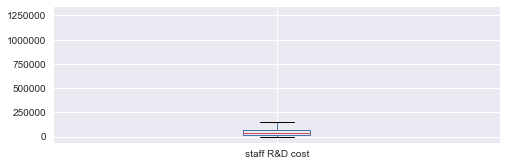

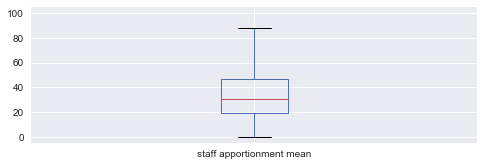

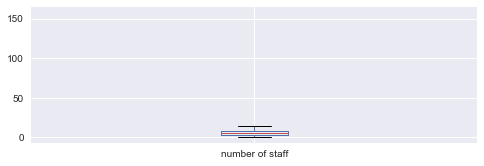

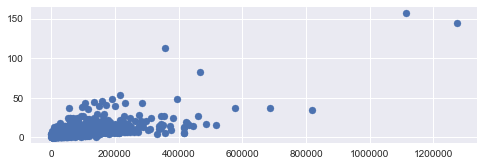

35585.5


In [6]:
#staff costs analysis
plt.subplot(2, 1, 1)
staff_cost_groupby.plot(kind='box', label='staff R&D cost')
plt.show()

plt.subplot(2, 1, 2)
staff_app_means.plot(kind='box', label='staff apportionment mean')
plt.show()

plt.subplot(2, 1, 1)
app_counts.plot(kind='box', label='number of staff')

plt.show()

plt.subplot(2, 1, 2)
plt.scatter(staff_cost_groupby, app_counts)

plt.show()
print(staff_cost_groupby.median())


In [7]:
sub_app_means=sub_d.groupby(['Cif', 'ye'])['pct'].mean()
sub_app_counts=sub_rd_cost.groupby(['Cif', 'ye']).count()

#groupby of subcontractor costs to retrive mean of percentage, count number of subcontractors per company, per year.

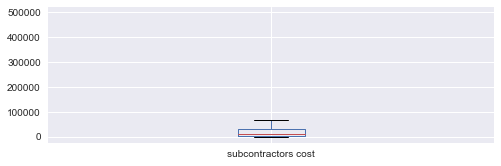

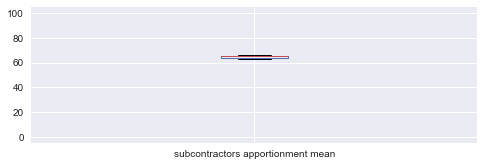

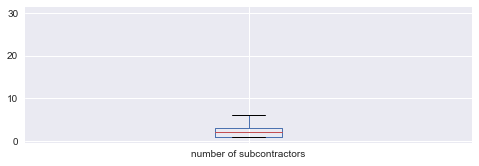

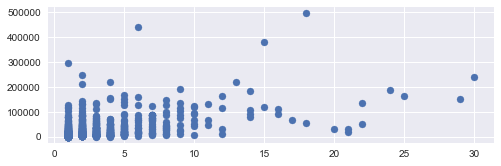

10450.924791666668


In [8]:
# subcontractor costs analysis
plt.subplot(2, 1, 1)
sub_cost_groupby.plot(kind='box', label='subcontractors cost')
plt.show()

plt.subplot(2, 1, 2)
sub_app_means.plot(kind='box', label='subcontractors apportionment mean')
plt.show()

plt.subplot(2, 1, 1)
sub_app_counts.plot(kind='box', label='number of subcontractors')

plt.show()

plt.subplot(2, 1, 2)
plt.scatter(sub_app_counts, sub_cost_groupby)

plt.show()
print(sub_cost_groupby.median())


In [9]:
#groupby of material costs to retrive mean of percentage, count number of material per company, per year.

consum_app_means=consum_d.groupby(['Cif', 'ye'])['pct'].mean()
consum_app_counts=consum_rd_cost.groupby(['Cif', 'ye']).count()

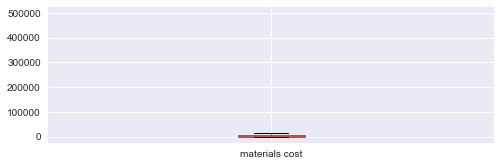

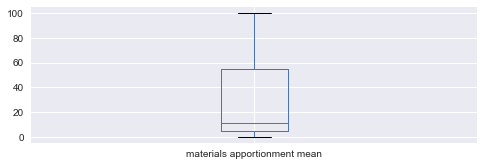

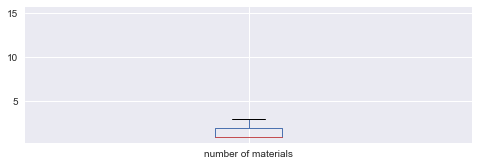

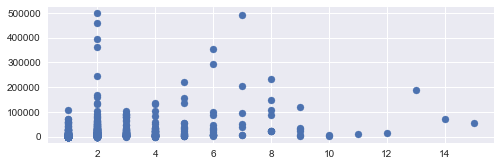

1287.02
499000.0


In [10]:
# material costs analysis
plt.subplot(2, 1, 1)
consum_cost_groupby.plot(kind='box', label='materials cost')
plt.show()

plt.subplot(2, 1, 2)
consum_app_means.plot(kind='box', label='materials apportionment mean')
plt.show()

plt.subplot(2, 1, 1)
consum_app_counts.plot(kind='box', label='number of materials')

plt.show()


plt.subplot(2, 1, 2)
plt.scatter(consum_app_counts, consum_cost_groupby)

plt.show()
print(consum_cost_groupby.median())
print(consum_cost_groupby.max())


In [11]:
#groupby of software costs to retrive mean of percentage, count number of software per company, per year.

soft_app_means=soft_d.groupby(['Cif', 'ye'])['pct'].mean()
soft_cost_counts=soft_rd_cost.groupby(['Cif', 'ye']).count()

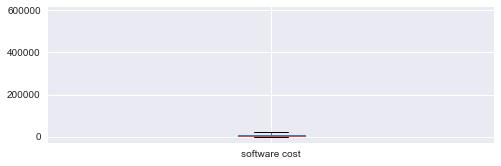

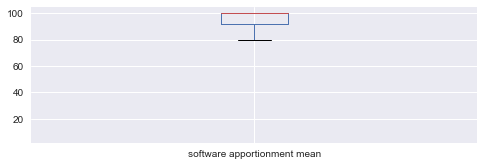

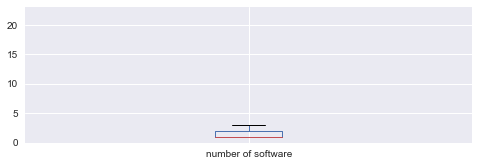

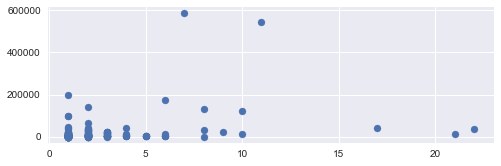

3544.78
587221.82


In [12]:
# software costs analysis
plt.subplot(2, 1, 1)
soft_cost_groupby.plot(kind='box', label='software cost')
plt.show()

plt.subplot(2, 1, 2)
soft_app_means.plot(kind='box', label='software apportionment mean')
plt.show()

plt.subplot(2, 1, 1)
soft_cost_counts.plot(kind='box', label='number of software')

plt.show()


plt.subplot(2, 1, 2)
plt.scatter(soft_cost_counts, soft_cost_groupby)

plt.show()

print(soft_cost_groupby.median())
print(soft_cost_groupby.max())


In [13]:
# top 15 most frequent industries
industry_mean=all_d.groupby('Industry')[0].mean().sort_values()
industry_mean

Ind_counts=all_d['Industry'].value_counts()
Ind_15=Ind_counts.head(16)
Ind_15

Ind_counts=all_d['Industry'].value_counts()
Ind_15=Ind_counts.head(16)
Ind_15=pd.DataFrame(Ind_15)
Ind_15=Ind_15.join(industry_mean, how='left')
Ind_15

,Industry,0
Manufacturing,382,68943.896486
IT/Software,286,75017.295170
Mechanical Engineering,123,94558.857149
Food & Drink,117,92758.595293
Construction,87,80037.420689
Management/Consulting/Training,63,76679.452389
Electronics,57,54631.610551
Printing/Publishing/Literature Binding,53,46254.996483
Telecommunications,37,87202.991839
Logistics & Distribution,34,53168.346250


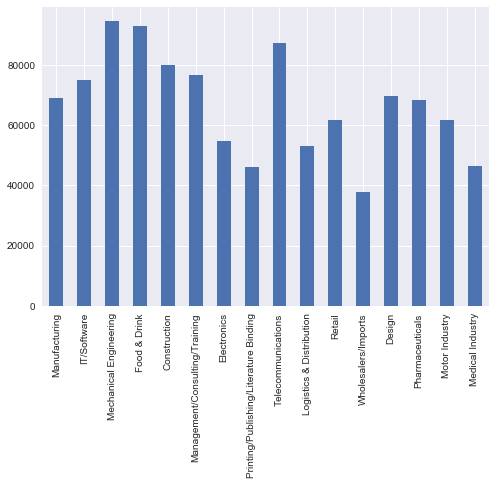

In [14]:
# top 15 industry plot
Ind_15[0].plot.bar()
plt.show()

Here we have a bar chart of the mean of each industry. Mechanical Engineering is the most valuable industry, with the Construction industry at a close second. Considering the differences in scale of R&D projects, the variance between the means of each industry is not so telling, but it is a useful consideration when we will be formulating the model for predicting claim values.

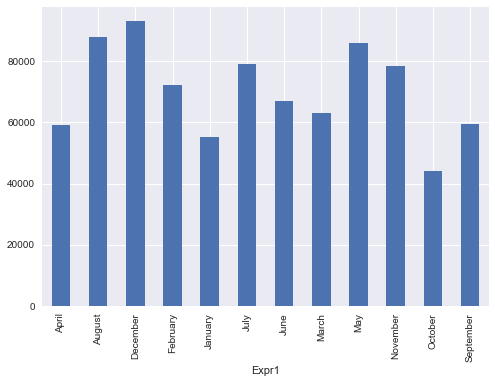

In [15]:
# accounting year-end plot
yr_end=all_d.groupby('Expr1')
yr_end_mean = yr_end[0].mean()
yr_end_mean.plot.bar()
plt.show()

C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


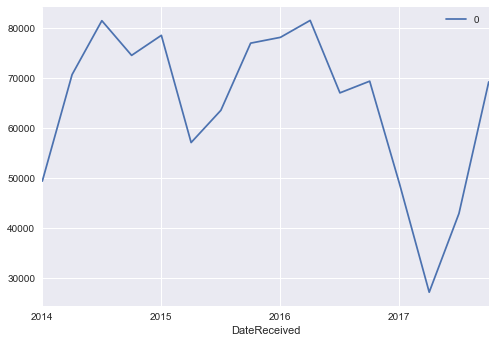

In [16]:
# expenditure values organised by the date in which companies began their contracts with us.
all_d['DateReceived']=pd.to_datetime(all_d['DateReceived'])
BQ_plot=all_d[['DateReceived', 0]].copy()
BQ_plot=BQ_plot.set_index('DateReceived')
BQ_plot = BQ_plot['2014-01-01':'2017-10-31']
BQ_plot.dropna(axis=0, how='any', inplace=True)
BQ_plot = BQ_plot.resample('BQ').mean()
BQ_plot=pd.DataFrame(BQ_plot)
BQ_plot.plot()
plt.show()

C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


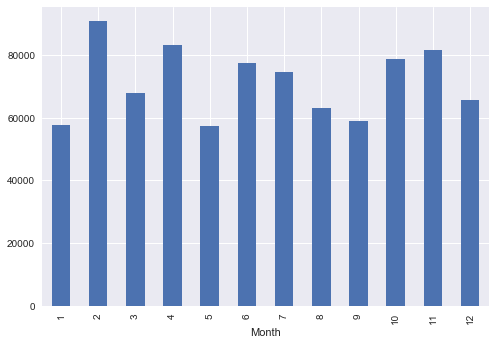

In [17]:
# plot of the same data as above, only binned per month.
all_d['DateReceived']=pd.to_datetime(all_d['DateReceived'])
time_plot=all_d[['DateReceived', 0]].copy()
time_plot=time_plot.set_index('DateReceived')
time_plot['Month']=time_plot.index.month
month_plot=time_plot.groupby('Month')
month_plot=month_plot[0].mean()
month_plot.plot.bar()
plt.show()

Next we have a comparison of the identified claimable costs over a time period of three years. We can see that the trend is upwards. The average claim value has consistently increased and peaked in the third quarter of 2017, but we still have a consistent pattern of increases and decreases depending on the year. 

C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


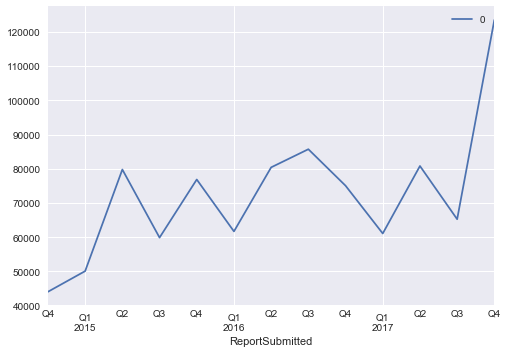

In [18]:
# expenditure values by when companies tax relief claims were submitted to HMRC.
all_d['ReportSubmitted']=pd.to_datetime(all_d['ReportSubmitted'])
d_submitted_plot=all_d[['ReportSubmitted', 0]].copy()
d_submitted_plot=d_submitted_plot.set_index('ReportSubmitted')
d_submitted_plot = d_submitted_plot['2014-10-01':'2017-10-31']
d_submitted_plot.dropna(axis=0, how='any', inplace=True)
d_submitted_plot = d_submitted_plot.resample('BQ').mean()
d_submitted_plot=pd.DataFrame(d_submitted_plot)
d_submitted_plot.plot()
plt.show()

In [19]:
# analysis of post codes set up, and a count of how many claims in the top 15 most frequent post codes.
all_d['PostCode']=all_d['PostCode'].str.split(' ').str[0]
postcode_counts=all_d['PostCode'].value_counts()
postcode_15=postcode_counts.head(15)
postcode_15.sum()

C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


643

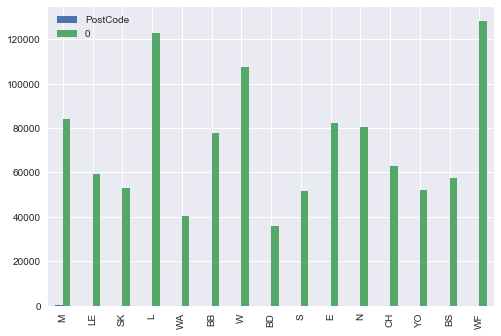

In [20]:
# top 15 post code areas and plot.
postcode_group=all_d.groupby('PostCode')
postcode_mean = postcode_group[0].mean()
postcode_mean

postcode_15=pd.DataFrame(postcode_15)
postcode_15=postcode_15.join(postcode_mean, how='left')
postcode_15.plot.bar()
plt.show()

In [21]:
# number of claims per phase.
phase_group=all_d.groupby('Claim Phase')
phase_counts=phase_group.size().reset_index(name='counts')
phase_counts

,Claim Phase,counts
0,Phase 01,1388
1,Phase 02,233
2,Phase 03,54
3,Phase 04,2
4,Phase 05,1


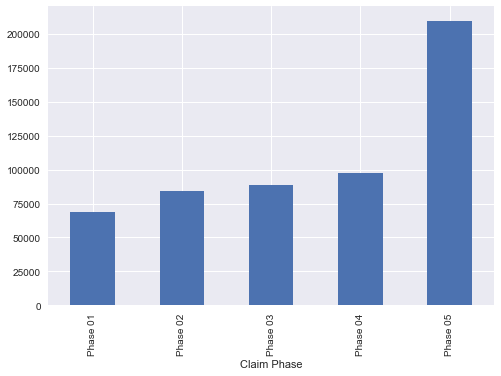

In [22]:
#  mean phase value plot
phase_plot=phase_group[0].mean()
phase_plot.plot.bar()
plt.show()

# Conclusion

From my analysis we can see that there are great variations in many features of the dataset which will be interesting in a deeper analysis whether they can be used to predict claim values. Industry is a particularly interesting variable to consider in itself, as it would be useful when considering a client solely on their industry what kind of investment in R&D we could anticipate. Although the industries typically invested in R&D dominate the others in terms of average investment, we have identified other variables which may be useful in predicting client R&D investments. We have looked at the time of the year in which clients sign up their contracts with us, their accounting ending periods, and post codes. These variables show variations in benefit values that would be useful to model along the industry type to deepen our prediction into R&D values. A question arises whether we have the dataset to make this analysis considering the number of claims in each phase, and the number of claims by each postcode. If we are successful in statistical analysis of the data we could uncover deeper insights into these variables and make a more accurate prediction.